<a href="https://colab.research.google.com/github/Enthusiasmile/Machine-Learning/blob/main/Tusharbahirat_Task01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this regression task we will predict the percentage of marks using Python Scikit-Learn library that a student is expected to score based upon the number of hours they studied.

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#importing data
data=pd.read_csv('http://bit.ly/w-data')
print('data imported successfully')
data.head(10)

data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's create the plot using dataset to find interrelation

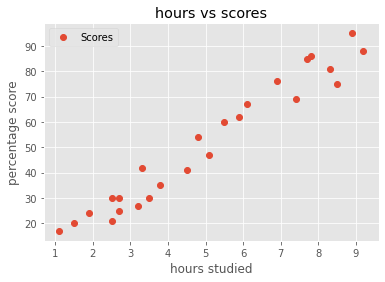

In [14]:
#plotting the  distribution of scores
from matplotlib import style
style.use('ggplot')
data.plot(x='Hours',y='Scores',style='o')
plt.title('hours vs scores')
plt.xlabel('hours studied')
plt.ylabel('percentage score')
plt.show()

From the above graph, we can clearly see that there is positive linear relation between the number of hours and percentage of score

**Preaparing the data**.

Now let's divide the data into "attributes" (inputs) and "labels" (outputs).

In [4]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values

Now let's split this data into training and test sets using Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,
                                                test_size=0.2,random_state=0)


**Training the Algorithm**


We have split our data into training and testing sets,now let's train our algorithm.

In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
print('Training complete')

Training complete


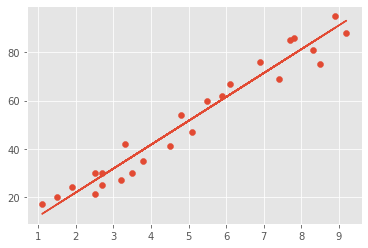

In [18]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

**Making Predictions**


Now that we have trained our algorithm, it's time to make some predictions.

In [20]:
print(X_test)
y_pred=regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
#comparing actual vs predicted
df= pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [24]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print('no of hours={}'.format(hours))
print('predicted score ={}'.format(own_pred[0]))

no of hours=[[9.25]]
predicted score =93.69173248737539


**Evaluating the model**


Finally, let's evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
